In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

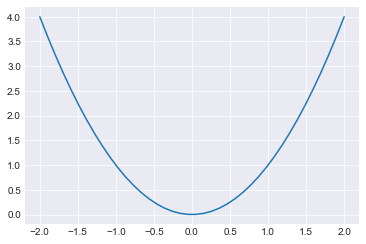

In [2]:
# Simple Graph
x = np.linspace(-2, 2, 40)
y = x**2
plt.plot(x, y)
plt.savefig('Figure_2.2.png')
plt.show()

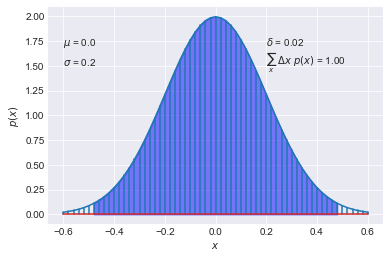

In [3]:
# Integral of Density
meanval = 0.0
sdval = 0.2
xlow = meanval - 3*sdval
xhigh = meanval + 3*sdval
dx = 0.02

x = np.arange(xlow, xhigh, dx)
y = 1/(sdval*np.sqrt(2*np.pi))*np.exp(-0.5*((x - meanval)/sdval)**2)

plt.stem(x,y, markerfmt='')
plt.fill_between(x, 0, y, where=np.logical_and(x>-0.5, x<0.5), color='blue', alpha=0.5)
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
area = np.sum(dx*y)
plt.text(-0.6, 1.7, '$\mu$ = {}'.format(meanval))
plt.text(-0.6, 1.5, '$\sigma$ = {}'.format(sdval))
plt.text(0.2, 1.7, '$\delta$ = {}'.format(dx))
plt.text(0.2, 1.5, '$\sum_x$ $\Delta x$ $p(x)$ = {:.2f}'.format(area))
plt.show()

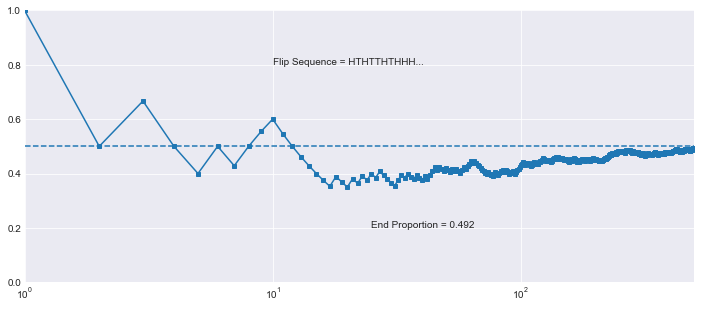

In [4]:
# Running Proportion
N = 500
np.random.seed(47405)
flip_sequence = np.random.choice(a=(0,1), p=(0.5, 0.5), size=N, replace=True)
r = np.cumsum(flip_sequence)
n = np.linspace(1, N, N)
run_prop = r/n

plt.figure(figsize=(12,5))
plt.plot(n, run_prop, 's-', ms=4)
plt.xscale('log')
plt.xlim(1, N)
plt.ylim(0,1)
plt.axhline(y=0.5, ls='--')

flipletters = ''
for i in flip_sequence[:10]:
    if i == 1:
        flipletters += 'H'
    else:
        flipletters += 'T'
        
plt.text(10,0.8, 'Flip Sequence = {}...'.format(flipletters))
plt.text(25,0.2, 'End Proportion = {}'.format(run_prop[-1]))
plt.show()

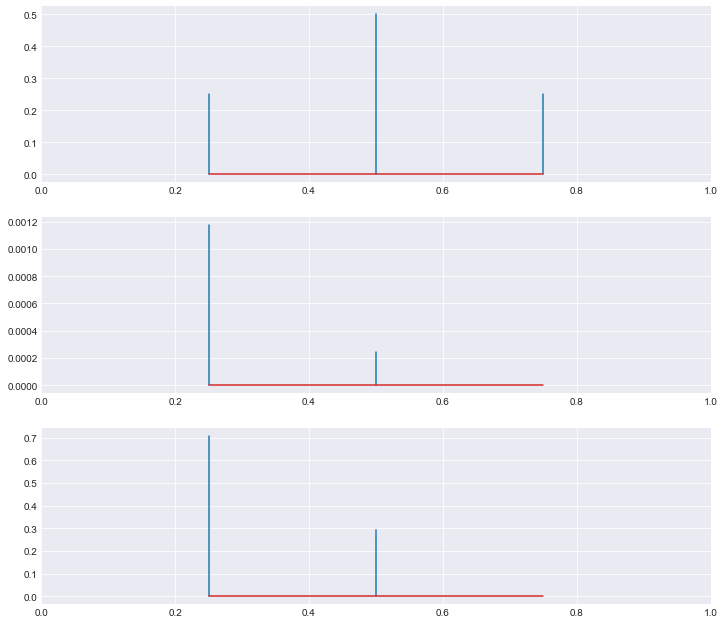

In [6]:
n_theta_vals = 3
theta = np.linspace(1/(n_theta_vals+1), n_theta_vals/(n_theta_vals+1), n_theta_vals)
p_theta = np.minimum(theta, 1-theta)
p_theta = p_theta / np.sum(p_theta)

data = np.repeat([1,0], [3,9])
n_heads = np.sum(data)
n_tails = len(data) - n_heads

p_data_given_theta = theta**n_heads * (1-theta)**n_tails
p_data = np.sum(p_data_given_theta * p_theta)
p_theta_given_data = p_data_given_theta * p_theta / p_data

plt.figure(figsize=(12,11))
plt.subplots_adjust(hspace=0.2)
plt.subplot(3,1,1)
plt.stem(theta, p_theta, markerfmt=' ')
plt.xlim(0,1)
plt.subplot(3,1,2)
plt.stem(theta, p_data_given_theta, markerfmt=' ')
plt.xlim(0,1)
plt.subplot(3,1,3)
plt.stem(theta, p_theta_given_data, markerfmt=' ')
plt.xlim(0,1)

plt.show()

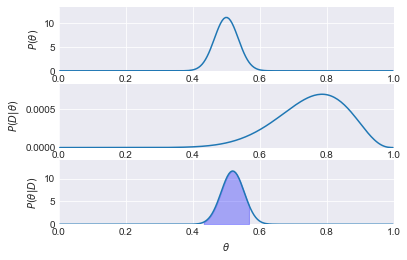

In [7]:
# Bernoulli-Beta
from scipy.optimize import fmin
from scipy.stats import *
from scipy.special import beta as beta_func

def HDIofICDF(dist_name, credMass=0.95, **args):
    distri = dist_name(**args)
    incredMass = 1.0 - credMass
    
    def intervalWidth(lowTailPr):
        return distri.ppf(credMass + lowTailPr) - distri.ppf(lowTailPr)
    
    HDIlowTailPr = fmin(intervalWidth, incredMass, ftol=1e-8, disp=False)[0]
    
    return distri.ppf([HDIlowTailPr, credMass + HDIlowTailPr])


data = np.repeat([1,0], [11,3])

a = 100
b = 100
z = sum(data[data==1])
N = len(data)
post_shape = [a+z, b+N-z]
p_data = beta_func(a+z, b+N-z)/beta_func(a, b)
bin_width = 0.005
theta = np.arange(bin_width/2, 1-(bin_width/2)+bin_width, bin_width)
p_theta = beta.pdf(theta, a, b)
p_data_given_theta = theta**z * (1-theta)**(N-z)
post_a = a+z
post_b = b+N-z
p_theta_given_data = beta.pdf(theta, a+z, b+N-z)
intervals = HDIofICDF(beta, credMass=0.95, a=100, b=100)

plt.subplot(3,1,1)
plt.plot(theta, p_theta)
plt.xlim(0, 1)
plt.ylim(0, np.max(p_theta)*1.2)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$P(\theta)$')

plt.subplot(3,1,2)
plt.plot(theta, p_data_given_theta)
plt.xlim(0, 1)
plt.ylim(0, np.max(p_data_given_theta)*1.2)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$P(D|\theta)$')

plt.subplot(3,1,3)
plt.plot(theta, p_theta_given_data)
plt.xlim(0, 1)
plt.ylim(0, np.max(p_theta_given_data)*1.2)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$P(\theta|D)$')
plt.fill_between(theta, 0, p_theta_given_data, where=np.logical_and(theta > intervals[0], theta < intervals[1]), color='blue', alpha=0.3)

plt.show()

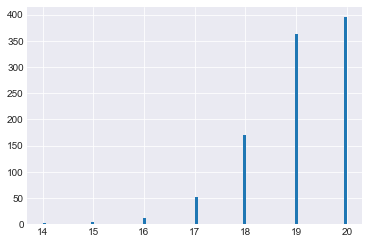

In [20]:
# Bernoulli-Beta Posterior Predictions
prior_a = 100
prior_b = 1
actual_Z = 8
actual_N = 12

post_a = prior_a + actual_Z
post_b = prior_b + actual_N - actual_Z

sim_sample_size = 20

samples = 1000

Z_record = np.zeros(samples)

for idx in range(0, samples):
    sample_theta = beta.rvs(post_a, post_b)
    sample_data = np.random.choice(a=[0,1], p=[1-sample_theta, sample_theta], size=sim_sample_size, replace=True)
    Z_record[idx] = sum(sample_data)
    
plt.hist(Z_record, bins=100)
plt.show()